# k-NN implementation with Parzen window

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.spatial import minkowski_distance
from pandas.plotting import scatter_matrix

In [0]:
class KNN():
    
    def __init__ (self, K = 3, p = 2, parzen=None):
        self.K = int(K)
        self.p = p
        self.parzen = parzen
        

    def fit(self, train_data, train_labels):
        self.train_data = np.array(train_data, dtype = np.float32)
        self.train_labels = np.array(train_labels, dtype = np.int64)
        self.n_classes = np.unique(train_labels).shape[0]


    def predict(self, test_data):
        self.test_data = np.array(test_data, dtype = np.float32)

        predictions = np.ndarray(shape = (test_data.shape[0],), dtype = np.int64)

        matrix = np.ndarray(shape=(train_data.shape[0],2), dtype = np.float32)
        for i, test_vec in enumerate(self.test_data):
            for j, train_vec in enumerate(self.train_data):
                matrix[j][0] = train_labels[j]
                matrix[j][1] = self.distance(test_vec, train_vec, self.p)
            matrix = matrix[np.argsort(matrix[:,1])]
            classes = np.array([item[0] for item in matrix[:self.K]], dtype = np.int64)
            if(self.parzen):
                weights = np.array([self.parzen(item[1] / matrix[self.K][1]) for item in matrix[:self.K]], dtype = np.float32)
                sums = np.zeros(shape = (self.n_classes,), dtype = np.float32)
                for cl in classes:
                    sums[cl] = sum(weights[classes==cl])
                #print(i, ') Sums: ', sums, ' Predict: ', sums.argmax())
                predictions[i] = sums.argmax()
            else:
                uniqs = np.unique(classes, return_counts=True)
                predictions[i] = uniqs[0][np.argmax(uniqs[1])]
        return predictions

    def score(self, data, labels):
      return sum(self.predict(data) == labels)/ len(labels)

    def distance(self, v1, v2, p=2):
        return minkowski_distance(v1,v2,p)

In [0]:
data = pd.read_csv("/content/iris.csv", sep=',')
data = data.sample(frac=1)

In [0]:
data.head()

sepal.length  sepal.width  petal.length  petal.width     variety
135           7.7          3.0           6.1          2.3   Virginica
28            5.2          3.4           1.4          0.2      Setosa
72            6.3          2.5           4.9          1.5  Versicolor
143           6.8          3.2           5.9          2.3   Virginica
49            5.0          3.3           1.4          0.2      Setosa

In [0]:
data.shape

(150, 5)

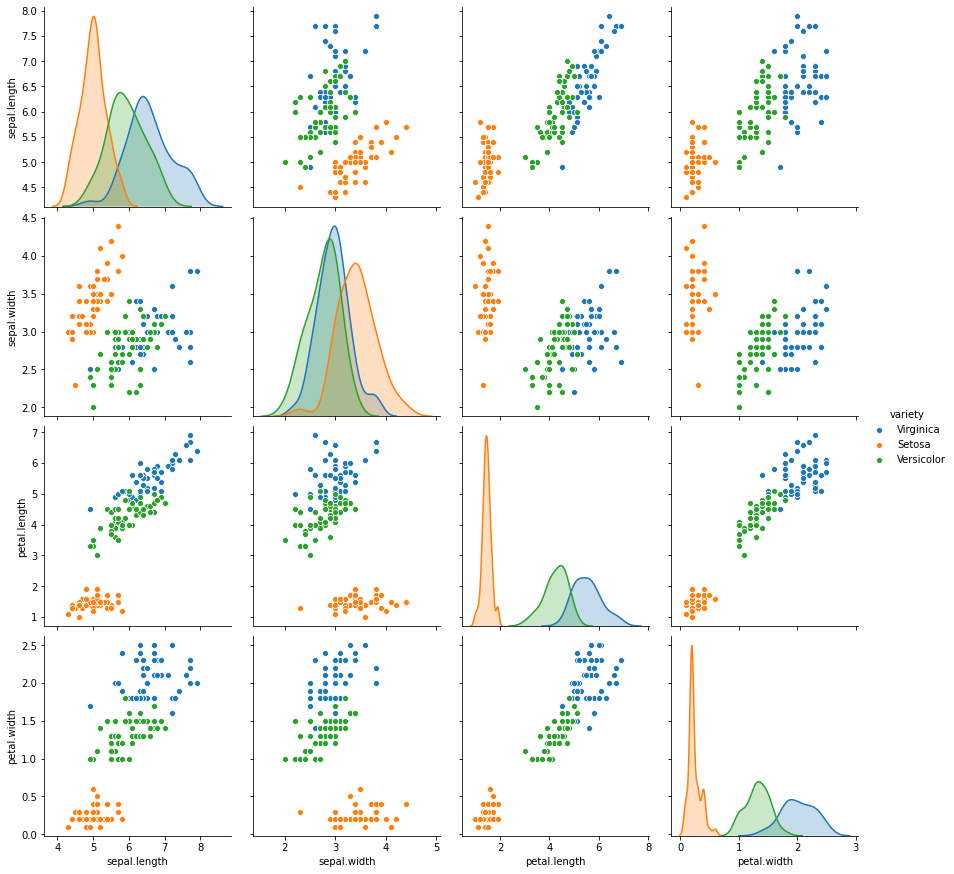

In [0]:
sns.pairplot(data, hue="variety", height=3);

In [0]:
train_data = data.drop('variety', axis = 1).values[:130]
train_labels = data.variety.map({'Setosa': 0, 'Versicolor':1, 'Virginica':2}).values[:130]

test_data = data.drop('variety', axis = 1).values[130:]
test_labels = data.variety.map({'Setosa':0, 'Versicolor':1, 'Virginica':2}).values[130:]

In [0]:
def gauss(r):
  return 1/(np.sqrt(2*np.pi)) * np.exp(-r**2 / 2)

def optim(r):
  return 3/4*(1-r**2)

In [0]:
def LOO_score(clf, data,labels):
    scores = np.zeros(shape=(data.shape[0],), dtype = np.int64)
    for i in range(data.shape[0]):
        clf.fit(np.delete(data,i, axis=0), np.delete(labels, i, axis=0))
        scores[i] = clf.score(data[i:i+1],labels[i:i+1])
    return scores.mean()

In [0]:
clf = KNN(K=5)
score = LOO_score(clf, train_data, train_labels)
score

0.7615384615384615

In [0]:
clf = KNN(K=5, parzen = optim)
clf.fit(train_data, train_labels)
print(f"Score: {clf.score(test_data, test_labels)}")

Score: 0.95


In [0]:
from sklearn.neighbors import KNeighborsClassifier

sk_clf = KNeighborsClassifier(n_neighbors=5, weights =  'distance')
sk_clf.fit(train_data, train_labels)
print(f"Score: {sk_clf.score(test_data, test_labels)}")

Score: 0.95


In [0]:
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [0]:
def plot_knn_regions(data, labels, clf):
  plot_decision_regions(train_data, train_labels, clf=clf, legend=2)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show();

In [0]:
pca = PCA(n_components = 2)
train_data = pca.fit_transform(train_data)

In [0]:
clf.fit(train_data, train_labels)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


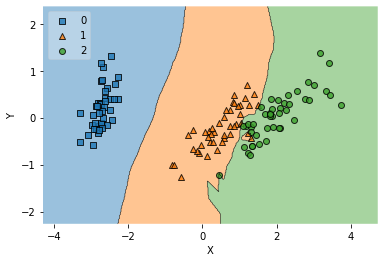

In [0]:
plot_knn_regions(train_data, train_labels, clf);